# Demography/ Pattern of use of Ford bike sharing
## by Olajide Buhari

## Investigation Overview


The insights i was probing for is basically the demography of the riders of this bike sharing service and 
the pattern of usage. The violin plots of the **days of the week** against the **start hour** shows a significant
pattern of rides, which indicate that most of the rides on weekdays are as a means of transportation to work and back
from work. Further more, the barplots shows a break down in the usage of the service by demograghy with conclusion that 
subscribed male Young adult use the service the most.


## Dataset Overview

The data set is made up of 183412 entries of bike sharing trip information. Each entry carries
atrributes associated with

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
df['start_time'] = pd.to_datetime(df['start_time']) #converts to datetime
df['end_time'] = pd.to_datetime(df['end_time']) #converts to datetime
df['start_station_id'] = df['start_station_id'].astype('object') #coverts to object datatype
df['end_station_id'] = df['end_station_id'].astype('object') #coverts to object datatype
df['bike_id'] = df['bike_id'].astype('object') #coverts to object datatype

df.dropna(subset=['start_station_id'], inplace=True)
df.drop(columns=['start_station_latitude','end_station_latitude','start_station_longitude',
                'end_station_longitude'], axis=1, inplace=True)

df_copy = df.copy()

df_copy['duration_mins'] = df_copy['duration_sec'] / 60

#creates a new column with duration converted from seconds to hours
df_copy['duration_hour'] = df_copy['duration_sec'] / 3600 

#create an age column by subtracting birth year from the year the data was collected
df_copy['age'] = 2019 - df_copy['member_birth_year']

#create a column  
df_copy['start_day'] = df_copy['start_time'].dt.day_name()


bins = [17, 25, 35, 65,142] 
labels = ["young", "young_adult", "adult","elderly"]

#creates a column of age classes
df_copy['age_group'] = pd.cut(df_copy['age'],  bins=bins, labels=labels) 

#Creates column of the hour of the day
df_copy['start_hour'] = df_copy['start_time'].dt.hour 
df_copy['end_hour'] = df_copy['end_time'].dt.hour

#Creates a column that shows if a day is weekday or weekend
wkday = ['Thursday', 'Wednesday', 'Tuesday', 'Monday','Friday']
wkend = [ 'Sunday', 'Saturday']
lis = []
for i in df_copy['start_day']:
    if i in wkday:
        lis.append('weekday')
    elif i in wkend:
        lis.append('weekend')
    else:
        print(' unknown entry at')
        
df_copy['wkday_wkend'] = lis

## Distribution of the trip duration

This duration attribute was derived by subtracting the end_time from the start_time. From the plot, it shows that alot of the rides were short trips under 1 hr 

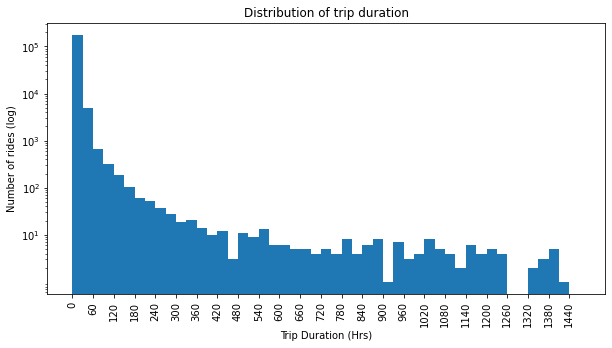

In [4]:
plt.figure(figsize=(10,5))
plt.title('Distribution of trip duration')
plot_bins = np.arange(0,1500,30)
plt.hist(data=df_copy, x="duration_mins", bins=plot_bins)
plt.yscale('log') 
plt.xlabel('Trip Duration (Hrs)')
plt.ylabel('Number of rides (log)')
plt.yticks([10**1, 10**2, 10**3, 10**4, 10**5])
plt.xticks(np.arange(0,1500,60), rotation=90);

## Distribution of Age

The age group that mostly use this service falls between 26years and 34 years. 
Also , after age 34, there is a decrease in the number of trips as age increase.

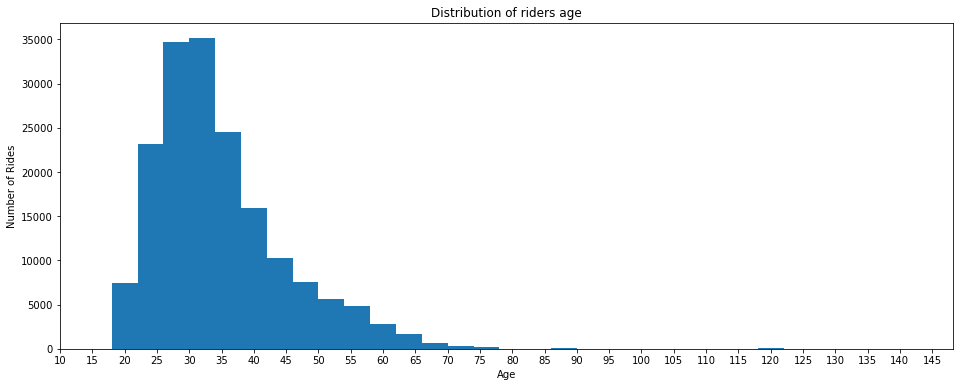

In [5]:
plt.figure(figsize=(16,6))
plt.title('Distribution of riders age')
plt.hist(data=df_copy, x='age', bins=np.arange(18,141+5, 4), color=sns.color_palette()[0])
plt.xticks(np.arange(10,150,5))
plt.xlabel('Age')
plt.ylabel('Number of Rides');

## Violin plot - Day of the week Vs Trip Start Hour

I was able to understand the pattern of usage of the service . Most of the start hours on weekdays are before the start of work hour(9am) and around close of business(5pm). This indicate that the bike sharing service is used as a means to convey riders to work in the morning and from work after the close of business. While on weekends ride start time spans through out the day, between 8am and 6pm.


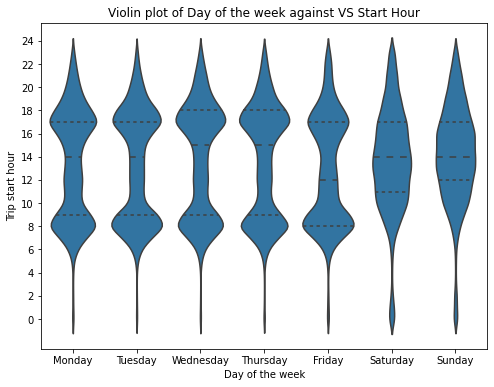

In [6]:
hour = np.arange(0,26,2)
ordered = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(8,6))
plt.title('Violin plot of Day of the week against VS Start Hour')
sns.violinplot(data=df_copy, x='start_day', y='start_hour',
               order=ordered, color= sns.color_palette()[0], inner='quartile')
plt.xlabel('Day of the week')
plt.ylabel('Trip start hour')
plt.yticks(hour);

### Number of trips by Age group and Gender
The plot shows that Male young adults between age 26 to 35 years use this service the most.

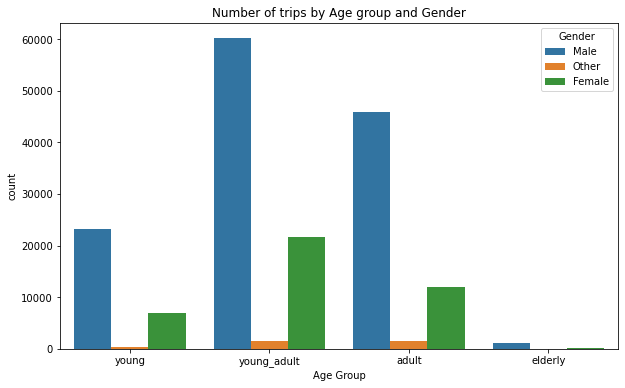

In [7]:
plt.figure(figsize=(10,6))
plt.title('Number of trips by Age group and Gender')
sns.countplot(data=df_copy , x= 'age_group', hue='member_gender')
plt.xlabel("Age Group");
plt.legend(title="Gender");

In [9]:
!jupyter nbconvert ford_bike_Part2.ipynb --to slides --post serve --no-input

[NbConvertApp] Converting notebook ford_bike_Part2.ipynb to slides
[NbConvertApp] Writing 696672 bytes to ford_bike_Part2.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Mach\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Mach\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Mach\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\Mach\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\Mach\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\Users\Ma